## ML Model Development -- K-Nearest Neighbors (KNN)

In [1]:
import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

from imblearn.over_sampling import RandomOverSampler


In [42]:
try:
    with open('../config.yaml') as file:
        config = yaml.safe_load(file)
except:
    print("Yaml file not found.")

In [43]:
# Load merged datasets -- Judicial Autonomy index, macro- and micro-indicators subset & V-Dem dataset

q1_index_macro_micro_vdem = pd.read_csv(config['output_data']['q1_output_index_macro_micro_vdem'])
q1_index_macro_micro_vdem = q1_index_macro_micro_vdem.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
q1_index_macro_micro_vdem.head()

,country,year,country_year,index_measure,q1_macro_appointment_procedures_ind_measure,q1_micro_appointment_judges_ind_measure,q1_micro_appointment_court_presidents_ind_measure,q1_micro_appointment_veto_ind_measure,q1_macro_selection_criteria_ind_measure,q1_micro_selection_predetermined_law_ind_measure,...,q1_micro_judicial_self_governance_bodies_ind_measure,q1_micro_judicial_self_governance_competences_ind_measure,q1_micro_courts_administration_ind_measure,reg_id,reg_type,v2x_regime,v2x_polyarchy,reg_trans,row_regch_event,dem_ep
0,Albania,2000,Albania_2000,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.5,0.0,1.0,ALB_1914_2004,0.0,1.0,0.407,0.0,0.0,1
1,Albania,2001,Albania_2001,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.5,0.0,1.0,ALB_1914_2004,0.0,1.0,0.440,0.0,0.0,1
2,Albania,2002,Albania_2002,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.5,0.0,1.0,ALB_1914_2004,0.0,1.0,0.484,0.0,0.0,1
3,Albania,2003,Albania_2003,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.5,0.0,1.0,ALB_1914_2004,0.0,1.0,0.490,0.0,0.0,1
4,Albania,2004,Albania_2004,0.55,0.55,0.33,0.33,1.0,0.5,0.67,...,0.5,0.0,1.0,ALB_1914_2004,0.0,1.0,0.490,0.0,0.0,1


In [4]:
# Check data types of all columns
#q1_index_macro_micro_vdem.dtypes

In [5]:
# Check for missing values
#q1_index_macro_micro_vdem.isna().sum()

### 1. KNN Model

#### 1.1 Classification Model -- Predicting V-Dem Regime Type (boolean)

#### 1.1.1 Based on Judicial Autonomy Micro Indicators

In [6]:
# Select relevant columns for KNN classification model
columns_micro_regtype_knn_class_model=['reg_type',
                                        'q1_micro_appointment_judges_ind_measure',
                                        'q1_micro_appointment_court_presidents_ind_measure',
                                        'q1_micro_appointment_veto_ind_measure',
                                        'q1_micro_selection_predetermined_law_ind_measure',
                                        'q1_micro_selection_intl_standards_ind_measure',
                                        'q1_micro_transparency_appeal_ind_measure',
                                        'q1_micro_judge_tenure_ind_measure',
                                        'q1_micro_judge_immunity_ind_measure',
                                        'q1_micro_judge_salary_ind_measure',
                                        'q1_micro_disciplinary_proceedings_law_ind_measure',
                                        'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                        'q1_micro_conflict_recusal_evaluation_ind_measure',
                                        'q1_micro_judicial_self_governance_bodies_ind_measure',
                                        'q1_micro_judicial_self_governance_competences_ind_measure',
                                        'q1_micro_courts_administration_ind_measure']

In [7]:
# Subset columns for KNN classification model
knn_classifier_regtype_data_micro = q1_index_macro_micro_vdem[columns_micro_regtype_knn_class_model].copy()

# Transform regime type (target column) to boolean
knn_classifier_regtype_data_micro['reg_type'] = knn_classifier_regtype_data_micro['reg_type'].astype('boolean')                                                 

In [8]:
# Define target and features
target = knn_classifier_regtype_data_micro['reg_type']
features = knn_classifier_regtype_data_micro.drop(columns='reg_type')

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [10]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_regtype_micro = KNeighborsClassifier(n_neighbors=3)

In [11]:
# Fit the model
knn_cl_regtype_micro.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
pred = knn_cl_regtype_micro.predict(X_train)
#pred

In [13]:
knn_cl_regtype_micro.score(X_test, y_test)
#print(f"The accuracy of the model is {round(knn_cl.score(X_test, y_test)*100,2)} %")

0.9347826086956522

**Outcome:** The accuracy of the model is 93.48 %

#### 1.1.2 Based on Judicial Autonomy Macro Indicators

In [14]:
# Select relevant columns for KNN classification model
columns_macro_regtype_knn_class_model=['reg_type',
                                        'q1_macro_appointment_procedures_ind_measure',
                                        'q1_macro_selection_criteria_ind_measure',
                                        'q1_macro_professional_rights_ind_measure',
                                        'q1_macro_professional_obligations_ind_measure',
                                        'q1_macro_judicial_administration_ind_measure']

In [15]:
# Subset columns for KNN classification model
knn_classifier_regtype_data_macro = q1_index_macro_micro_vdem[columns_macro_regtype_knn_class_model].copy()

# Transform regime type (target column) to boolean
knn_classifier_regtype_data_macro['reg_type'] = knn_classifier_regtype_data_macro['reg_type'].astype('boolean')                                                 

In [16]:
# Define target and features
target = knn_classifier_regtype_data_macro['reg_type']
features = knn_classifier_regtype_data_macro.drop(columns='reg_type')

In [17]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [18]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_regtype_macro = KNeighborsClassifier(n_neighbors=3)

In [19]:
# Fit the model
knn_cl_regtype_macro.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
pred = knn_cl_regtype_macro.predict(X_train)
#pred

In [21]:
knn_cl_regtype_macro.score(X_test, y_test)
#print(f"The accuracy of the model is {round(knn_cl.score(X_test, y_test)*100,2)} %")

0.9510869565217391

**Outcome:** The accuracy of the model is 95.10 %

**Summary:**
- The accuracy of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Regime Types (target)** slightly **increases from 93.48% to 95.10%** in comparison to using the micro indicators.

#### 1.2 Classification Model -- Predicting V-Dem Regimes of the World (RoW) (categorical, 4 levels)

#### 1.2.1 Based on Judicial Autonomy Micro Indicators

In [22]:
# Select relevant columns for KNN classification model
columns_micro_row_knn_class_model=['v2x_regime',
                                            'q1_micro_appointment_judges_ind_measure',
                                            'q1_micro_appointment_court_presidents_ind_measure',
                                            'q1_micro_appointment_veto_ind_measure',
                                            'q1_micro_selection_predetermined_law_ind_measure', 
                                            'q1_micro_selection_intl_standards_ind_measure',
                                            'q1_micro_transparency_appeal_ind_measure',
                                            'q1_micro_judge_tenure_ind_measure',
                                            'q1_micro_judge_immunity_ind_measure',
                                            'q1_micro_judge_salary_ind_measure',
                                            'q1_micro_disciplinary_proceedings_law_ind_measure',
                                            'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                            'q1_micro_conflict_recusal_evaluation_ind_measure',
                                            'q1_micro_judicial_self_governance_bodies_ind_measure',
                                            'q1_micro_judicial_self_governance_competences_ind_measure',
                                            'q1_micro_courts_administration_ind_measure']

In [23]:
# Subset columns for KNN classification model
knn_classifier_row_data_micro = q1_index_macro_micro_vdem[columns_micro_row_knn_class_model].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_micro['v2x_regime'] = knn_classifier_row_data_micro['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [24]:
# Define target and features
target = knn_classifier_row_data_micro['v2x_regime']
features = knn_classifier_row_data_micro.drop(columns='v2x_regime')

In [25]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [26]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_row_micro = KNeighborsClassifier(n_neighbors=3)

In [27]:
# Fit the model
knn_cl_row_micro.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
pred = knn_cl_row_micro.predict(X_train)
#pred

In [29]:
knn_cl_row_micro.score(X_test, y_test)
#print(f"The accuracy of the model is {round(knn_cl.score(X_test, y_test)*100,2)} %")

0.9130434782608695

**Outcome:** The accuracy of the model is 91.30%

**Summary:**
- The accuracy of the model based on the Judicial Autonomy micro indicators (features) and V-Dem Regimes of the World (target) is 91.30%

#### 1.2.2 Based on Judicial Autonomy Macro Indicators

In [30]:
# Select relevant columns for KNN classification model
columns_macro_row_knn_class_model=['v2x_regime',
                                            'q1_macro_appointment_procedures_ind_measure',
                                            'q1_macro_selection_criteria_ind_measure',
                                            'q1_macro_professional_rights_ind_measure',
                                            'q1_macro_professional_obligations_ind_measure',
                                            'q1_macro_judicial_administration_ind_measure']

In [31]:
# Subset columns for KNN classification model
knn_classifier_row_data_macro = q1_index_macro_micro_vdem[columns_macro_row_knn_class_model].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_macro['v2x_regime'] = knn_classifier_row_data_macro['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [32]:
# Define target and features
target = knn_classifier_row_data_macro['v2x_regime']
features = knn_classifier_row_data_macro.drop(columns='v2x_regime')

In [33]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [34]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_row_macro = KNeighborsClassifier(n_neighbors=3)

In [35]:
# Fit the model
knn_cl_row_macro.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
pred = knn_cl_row_macro.predict(X_train)
#pred

In [37]:
knn_cl_row_macro.score(X_test, y_test)
#print(f"The accuracy of the model is {round(knn_cl.score(X_test, y_test)*100,2)} %")

0.8967391304347826

**Outcome:** The accuracy of the model is 89.67 %.


**Summary:** 
- The accuracy of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Regimes of the World (target)** is 89.67% and therefore **slightly lower** than when based on the micro indicators (91.30%).
- Overall, the model's accuracy is slightly lower compared to using V-Dem Regime Types (target) with the accuracy being 93.48% for micro indicators and 95.10% for macro indicators, respectively. 

#### 1.3 Regression Model -- Predicting V-Dem Democracy Index Score

#### 1.3.1 Based on Judicial Autonomy Micro Indicators

In [38]:
# Select relevant columns for KNN regression model
columns_micro_knn_regr_model=['v2x_polyarchy', 
                                 'q1_micro_appointment_judges_ind_measure',
                                 'q1_micro_appointment_court_presidents_ind_measure',
                                 'q1_micro_appointment_veto_ind_measure',
                                 'q1_micro_selection_predetermined_law_ind_measure',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_judge_salary_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure',
                                 'q1_micro_courts_administration_ind_measure']

In [39]:
# Subset columns for KNN classification model
knn_regression_data_micro = q1_index_macro_micro_vdem[columns_micro_knn_regr_model].copy()

In [40]:
# Pairplot to check distribution of values

sns.pairplot(knn_regression_data, y_vars=['v2x_polyarchy'], x_vars=knn_regression_data.columns[1:5], kind='scatter')
sns.pairplot(knn_regression_data, y_vars=['v2x_polyarchy'], x_vars=knn_regression_data.columns[6:11], kind='scatter')
sns.pairplot(knn_regression_data, y_vars=['v2x_polyarchy'], x_vars=knn_regression_data.columns[12:15], kind='scatter');

NameError: name 'knn_regression_data' is not defined

In [ ]:
# Define target and features
target = knn_regression_data_micro['v2x_polyarchy']
features = knn_regression_data_micro.drop(columns='v2x_polyarchy')

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
# Initialize KNN instance (with hyperparameter n_neighbors = 10)
knn_reg_micro = KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Fit the model
knn_reg_micro.fit(X_train, y_train)

In [ ]:
pred = knn_reg_micro.predict(X_train)
#pred

In [ ]:
knn_reg_micro.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_reg.score(X_test, y_test)*100,2)} %")

**Outcome:** The R-Squared of the model is 90.98 %

**Summary:**
- The R-Squared of the model based on the **Judicial Autonomy micro indicators (features) and V-Dem Democracy Index (target)** is **90.98%**.

#### 1.3.2 Based on Judicial Autonomy Macro Indicators

In [ ]:
# Select relevant columns for KNN classification model
columns_macro_knn_regr_model=['v2x_polyarchy',
                                       'q1_macro_appointment_procedures_ind_measure',
                                       'q1_macro_selection_criteria_ind_measure',
                                       'q1_macro_professional_rights_ind_measure',
                                       'q1_macro_professional_obligations_ind_measure',
                                       'q1_macro_judicial_administration_ind_measure']

In [ ]:
# Subset columns for KNN classification model
knn_regression_data_macro = q1_index_macro_micro_vdem[columns_macro_knn_regr_model].copy()

In [ ]:
# Pairplot to check distribution of values
sns.pairplot(knn_regression_data_macro, y_vars=['v2x_polyarchy'], x_vars=knn_regression_data_macro.columns[1:6], kind='scatter');

In [ ]:
# Define target and features
target = knn_regression_data_macro['v2x_polyarchy']
features = knn_regression_data_macro.drop(columns='v2x_polyarchy')

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
# Initialize KNN instance (with hyperparameter n_neighbors = 10)
knn_reg_macro = KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Fit the model
knn_reg_macro.fit(X_train, y_train)

In [ ]:
pred = knn_reg_macro.predict(X_train)
#pred

In [ ]:
knn_reg_macro.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_reg.score(X_test, y_test)*100,2)} %")

**Outcome:** The R-Squared of the model is 83.63 %.

**Summary:** 
- The R-Squared of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Democracy Index (target)** is **83.63%** and therefore **lower** than when based on the micro indicators (90.98%).

- Overall, the model's accuracy is lower compared to using V-Dem Regime Types (target) with the accuracy being 93.48 % for micro indicators and 95.10 % for macro indicators, respectively.

### 1.4 Summary

(Draft)

- The KNN model performed best for:
- Categorical Predictions of V-Dem Regime Types (target) with Judicial Autonomy macro indicators (features) returning the highest accuracy of 95.10%, followed by the micro indicators returning an accuracy of 93.48%.

- The accuracy of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Regimes of the World (target)** is 89.67% and therefore **slightly lower** than when based on the micro indicators (91.30%).

- The R-Squared of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Democracy Index (target)** is **83.63%** and therefore **lower** than when based on the micro indicators (90.98%).


- For predicting predicting the V-Dem Democracy Index (4 levels) and V-Dem Democracy Index (numerical), Judicial Autonomy micro indicators performed better. 


(Draft Ironhack AI)
Summary of KNN Model Performance:
Top Performance on Categorical Prediction:

For predicting V-Dem Regime Types (target), the model using Judicial Autonomy macro indicators as features achieved the highest accuracy at 95.10%, outperforming the model with micro indicators, which achieved 93.48% accuracy.
Comparison Based on Features:

Using Judicial Autonomy macro indicators (features) for predicting V-Dem Regimes of the World (target) resulted in an accuracy of 89.67%, which is slightly lower than the accuracy of 91.30% achieved with micro indicators as features.
R-Squared Scores:

The R-Squared score for the model utilizing Judicial Autonomy macro indicators and predicting the V-Dem Democracy Index was 83.63%. This is lower compared to the model with micro indicators, which scored 90.98% on the same target.
Highlights:
The KNN models have shown considerable strength in classifying V-Dem Regime Types with high accuracy, particularly when leveraging Judicial Autonomy macro indicators.
While macro indicators provide solid performance, micro indicators slightly edge them out in certain aspects, evidenced by both accuracy and R-Squared scores across different targets.

### 1.5 Feature Selection

#### 1.5.1 Feature Selection for Classification Model -- Predicting V-Dem Regimes of the World (RoW)

In [ ]:
# Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Regimes of the World

# Select columns
columns_correlation_matrix_micro=['v2x_regime', 
                                 'q1_micro_appointment_judges_ind_measure',
                                 'q1_micro_appointment_court_presidents_ind_measure',
                                 'q1_micro_appointment_veto_ind_measure',
                                 'q1_micro_selection_predetermined_law_ind_measure',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_judge_salary_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure',
                                 'q1_micro_courts_administration_ind_measure']

# Plot Heatmap
correlation_matrix_feature_sel_micro = q1_index_macro_micro_vdem[columns_correlation_matrix_micro].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_feature_sel_micro, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Judicial Autonomy Micro Indicators & V-Dem Democracy Index", fontsize=16, pad=20)
plt.show();

**Summary:**
- Low correlation (< 0.1) between v2x_regime (target) and features:
....
- Therefore, remove columns from features.

(We want low correlaction between features, but high correlaction between features and our target.)

In [ ]:
# Feature selection to improve KNN classification model (correlation <0.1)
selected_columns_micro_knn_class_model=['v2x_regime',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure']

In [ ]:
# TEST correlation <= 0.025
# Feature selection to improve KNN classification model
selected_columns_micro_knn_class_model_test=['v2x_regime', 
                                 'q1_micro_appointment_judges_ind_measure',
                                 #'q1_micro_appointment_court_presidents_ind_measure',
                                 'q1_micro_appointment_veto_ind_measure',
                                 'q1_micro_selection_predetermined_law_ind_measure',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 #'q1_micro_judge_salary_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 #'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure',
                                 'q1_micro_courts_administration_ind_measure']

In [ ]:
# Subset columns for KNN classification model
knn_classifier_row_data_micro_sel = q1_index_macro_micro_vdem[selected_columns_micro_knn_class_model].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_micro_sel['v2x_regime'] = knn_classifier_row_data_micro_sel['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [ ]:
# Define target and features
target = knn_classifier_row_data_micro_sel['v2x_regime']
features = knn_classifier_row_data_micro_sel.drop(columns='v2x_regime')

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_row_micro_sel = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit the model
knn_cl_row_micro_sel.fit(X_train, y_train)

In [ ]:
pred = knn_cl_row_micro_sel.predict(X_train)
#pred

In [ ]:
knn_cl_row_micro_sel.score(X_test, y_test)
#print(f"The accuracy of the model is {round(knn_cl.score(X_test, y_test)*100,2)} %")

**Outcome:** The accuracy of the model is 90.76%

**Summary:**
- After feature selection, the accuracy of the model based on the Judicial Autonomy micro indicators (features) and V-Dem Regimes of the World (target) is **90.76%**, and therefore **slightly lower than before (91.30%)**.

**Notes:** 
- selection: 90.76%
- test selection: 88.58%

#### 1.5.2 Feature Selection for Regression Model -- Predicting V-Dem Democracy Index Score

#### 1.5.2.1 Based on Judicial Autonomy Micro Indicators

In [ ]:
# Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Democracy Index

# Select columns
columns_correlation_matrix_micro=['v2x_polyarchy', 
                                 'q1_micro_appointment_judges_ind_measure',
                                 'q1_micro_appointment_court_presidents_ind_measure',
                                 'q1_micro_appointment_veto_ind_measure',
                                 'q1_micro_selection_predetermined_law_ind_measure',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_judge_salary_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure',
                                 'q1_micro_courts_administration_ind_measure']

# Plot Heatmap
correlation_matrix_feature_sel_micro = q1_index_macro_micro_vdem[columns_correlation_matrix_micro].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_feature_sel_micro, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Judicial Autonomy Micro Indicators & V-Dem Democracy Index", fontsize=16, pad=20)
plt.show();

**Summary:**
- Low correlation (< 0.1) between v2x_polyarchy (target) and features:
- q1_micro_appointment_judges_ind_measure,
- q1_micro_appointment_court_presidents_ind_measure,
- q1_micro_appointment_veto_ind_measure,
- q1_micro_selection_predetermined_law_ind_measure,
- q1_micro_judge_salary_ind_measure,
- q1_micro_disciplinary_proceedings_actors_ind_measure,
- q1_micro_courts_administration_ind_measure.
- Therefore, remove columns from features.

(We want low correlaction between features, but high correlaction between features and our target.)

In [ ]:
# Feature selection to improve KNN regression model (correlation <0.1)
selected_columns_micro_knn_regr_model=['v2x_polyarchy',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure']

In [ ]:
# TEST correlation (<= 0.025)
# Feature selection to improve KNN regression model
selected_columns_micro_knn_regr_model_test=['v2x_polyarchy', 
                                 'q1_micro_appointment_judges_ind_measure',
                                 'q1_micro_appointment_court_presidents_ind_measure',
                                 #'q1_micro_appointment_veto_ind_measure',
                                 #'q1_micro_selection_predetermined_law_ind_measure',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_judge_salary_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 #'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure',
                                 'q1_micro_courts_administration_ind_measure']

In [ ]:
# Subset columns for KNN classification model
knn_regression_data_micro_sel = q1_index_macro_micro_vdem[selected_columns_micro_knn_regr_model].copy()

In [ ]:
# Define target and features
target = knn_regression_data_micro_sel['v2x_polyarchy']
features = knn_regression_data_micro_sel.drop(columns='v2x_polyarchy')

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
# Initialize KNN instance (with hyperparameter n_neighbors = 10)
knn_reg_micro_sel = KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Fit the model
knn_reg_micro_sel.fit(X_train, y_train)

In [ ]:
pred = knn_reg_micro_sel.predict(X_train)
#pred

In [ ]:
knn_reg_micro_sel.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_reg.score(X_test, y_test)*100,2)} %")

**Outcome:** The R-Squared of the model is 92.30%.

**Notes:** 
- selection: 92.30%
- test selection: 91.72%

**Summary:**
- After feature selection, the R-Squared of the model based on the **Judicial Autonomy micro indicators (features) and V-Dem Democracy Index (target)** is **92.30%**, and **slightly higher** than before (90.98%)

#### 1.5.2.2 Based on Judicial Autonomy Macro Indicators

In [ ]:
# Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Democracy Index

# Select columns
columns_correlation_matrix_macro=['v2x_polyarchy',
                                       'q1_macro_appointment_procedures_ind_measure',
                                       'q1_macro_selection_criteria_ind_measure',
                                       'q1_macro_professional_rights_ind_measure',
                                       'q1_macro_professional_obligations_ind_measure',
                                       'q1_macro_judicial_administration_ind_measure']

# Plot Heatmap
correlation_matrix_feature_sel_macro = q1_index_macro_micro_vdem[columns_correlation_matrix_macro].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix_feature_sel_macro, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Democracy Index", fontsize=12, pad=20)
plt.show();

**Summary:**
- Low correlation between v2x_polyarchy (target) and **q1_macro_appointment_procedures_ind_measure** and **q1_macro_professional_obligations_ind_measure** (features), therefore remove both columns from features.

(We want low correlaction between features, but high correlaction between features and our target.)

In [ ]:
# Feature selection to improve KNN regression model
selected_columns_macro_knn_regr_model=['v2x_polyarchy',
                                  'q1_macro_selection_criteria_ind_measure',
                                  'q1_macro_professional_rights_ind_measure',
                                  'q1_macro_judicial_administration_ind_measure']

In [ ]:
# Subset columns for KNN classification model
knn_regression_data_macro_sel = q1_index_macro_micro_vdem[selected_columns_macro_knn_regr_model].copy()

In [ ]:
# Define target and features
target = knn_regression_data_macro_sel['v2x_polyarchy']
features = knn_regression_data_macro_sel.drop(columns='v2x_polyarchy')

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
# Initialize KNN instance (with hyperparameter n_neighbors = 10)
knn_reg_macro_sel = KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Fit the model
knn_reg_macro_sel.fit(X_train, y_train)

In [ ]:
pred = knn_reg_macro_sel.predict(X_train)
#pred

In [ ]:
knn_reg_macro_sel.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_reg.score(X_test, y_test)*100,2)} %")

**Outcome:** The R-Squared of the model is 79.21%.

**Summary:** 
- After feature selection, the R-Squared of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Democracy Index (target)** is **79.21%** and therefore **lower than before (83.63%)**.

**Summary:**
- For the classification model predicting V-Dem Regimes of the World (RoW), feature selection from Judicial Autonomy micro indicators led to slightly lower accuracy of the model. Therefore, when predicting the categorical target of V-Dem Regimes of the World based on Judicial Autonomy micro indicators, the model works better using all features.

- For the regression model predicting V-Dem Democracy Index Score, feature selection from Judicial Autonomy micro indicators led to slightly higher accuracy of the model. Therefore, when predicting the numerical target of V-Dem Democracy Index Score based on Judicial Autonomy micro indicators, the model works better using selected features (with correlation <= 0.025).

- Further Feature Engineering based on Judicial Autonomy micro indicators, predicting V-Dem Regimes of the World (categorical) and V-Dem Democracy Index Score (numerical). 

### 1.6 Handling Imbalanced Data

#### 1.6.1 Oversample for Classification Model -- Predicting V-Dem Regimes of the World (RoW)

In [ ]:
# Select relevant columns for KNN classification model
columns_micro_row_knn_class_model=['v2x_regime',
                                   'q1_micro_appointment_judges_ind_measure',
                                   'q1_micro_appointment_court_presidents_ind_measure',
                                   'q1_micro_appointment_veto_ind_measure',
                                   'q1_micro_selection_predetermined_law_ind_measure',
                                   'q1_micro_selection_intl_standards_ind_measure',
                                   'q1_micro_transparency_appeal_ind_measure',
                                   'q1_micro_judge_tenure_ind_measure',
                                   'q1_micro_judge_immunity_ind_measure',
                                   'q1_micro_judge_salary_ind_measure',
                                   'q1_micro_disciplinary_proceedings_law_ind_measure',
                                   'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                   'q1_micro_conflict_recusal_evaluation_ind_measure',
                                   'q1_micro_judicial_self_governance_bodies_ind_measure',
                                   'q1_micro_judicial_self_governance_competences_ind_measure',
                                   'q1_micro_courts_administration_ind_measure']

In [ ]:
# Subset columns for KNN classification model
knn_classifier_row_data_micro_over = q1_index_macro_micro_vdem[columns_micro_row_knn_class_model].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_micro_over['v2x_regime'] = knn_classifier_row_data_micro_over['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [ ]:
# Check distribution of V-Dem Regimes of the World before oversampling
row_counts = knn_classifier_row_data_micro_over['v2x_regime'].value_counts()
row_counts.plot(kind='bar')
plt.xlabel('');

In [ ]:
# Define target and features
target = knn_classifier_row_data_micro_over['v2x_regime']
features = knn_classifier_row_data_micro_over.drop(columns='v2x_regime')

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
# Oversampling minority class
oversample = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
# Check distribution of V-Dem Regimes of the World after oversampling
row_counts2 = y_train_over.value_counts()
row_counts2.plot(kind='bar');

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled_np = scaler.fit_transform(X_train_over)
X_test_scaled_np = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train_over.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

In [ ]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_class_macro_sel_over = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit the model
knn_class_macro_sel_over.fit(X_train_scaled_df, y_train_over)

In [ ]:
pred = knn_class_macro_sel_over.predict(X_train_scaled_df)
#pred

In [ ]:
knn_class_macro_sel_over.score(X_test_scaled_df, y_test)
print(f"The accuracy of the model is {round(knn_class_macro_sel_over.score(X_test_scaled_df, y_test)*100,2)}%")

**Summary:**
- After using StandardScaler and applying oversampling, the accuracy of the model based on the Judicial Autonomy micro indicators (features) and V-Dem Regimes of the World (target) is **88.59%**, and therefore **slightly lower than before (90.76%)**. 

### 1.7 Model Development

#### 1.7.1 RandomForest -- for Classification Model -- Predicting V-Dem Regimes of the World (RoW)

In [ ]:
# Select relevant columns for RandomForest
columns_micro_row_forest_class_model=['v2x_regime',
                                   'q1_micro_appointment_judges_ind_measure',
                                   'q1_micro_appointment_court_presidents_ind_measure',
                                   'q1_micro_appointment_veto_ind_measure',
                                   'q1_micro_selection_predetermined_law_ind_measure',
                                   'q1_micro_selection_intl_standards_ind_measure',
                                   'q1_micro_transparency_appeal_ind_measure',
                                   'q1_micro_judge_tenure_ind_measure',
                                   'q1_micro_judge_immunity_ind_measure',
                                   'q1_micro_judge_salary_ind_measure',
                                   'q1_micro_disciplinary_proceedings_law_ind_measure',
                                   'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                   'q1_micro_conflict_recusal_evaluation_ind_measure',
                                   'q1_micro_judicial_self_governance_bodies_ind_measure',
                                   'q1_micro_judicial_self_governance_competences_ind_measure',
                                   'q1_micro_courts_administration_ind_measure']

In [ ]:
# Subset columns for KNN classification model
forest_classifier_row_data_micro = q1_index_macro_micro_vdem[columns_micro_row_forest_class_model].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
forest_classifier_row_data_micro['v2x_regime'] = forest_classifier_row_data_micro['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [ ]:
# Define target and features
target = forest_classifier_row_data_micro['v2x_regime']
features = forest_classifier_row_data_micro.drop(columns='v2x_regime')

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_classifier.fit(X_train_scaled, y_train)

In [ ]:
# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

**NOTES/DRAFT**
- The accuracy of the KNN Classification Model based on the Judicial Autonomy micro indicators (features) and V-Dem Regimes of the World (target) was 91.30%.

In [ ]:
# Feature Importance Scores
feature_importances_class = rf_classifier.feature_importances_

In [ ]:
# Create DataFrame with feature importances
features_df_class = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_class})
features_df_class = features_df_class.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(features_df_class)

In [ ]:
# Plot feature importances

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df_class, x='Importance', y='Feature')

plt.title('Feature Importance Scores from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Judicial Autonomy Micro Indicator')
plt.show()

#### 1.7.2 RandomForest -- for Regression Model -- Predicting V-Dem Democracy Index Score

In [44]:
# Select relevant columns for RandomForest
columns_micro_row_forest_regr_model=['v2x_polyarchy',
                                     'q1_micro_appointment_judges_ind_measure',
                                     'q1_micro_appointment_court_presidents_ind_measure',
                                     'q1_micro_appointment_veto_ind_measure',
                                     'q1_micro_selection_predetermined_law_ind_measure',
                                     'q1_micro_selection_intl_standards_ind_measure',
                                     'q1_micro_transparency_appeal_ind_measure',
                                     'q1_micro_judge_tenure_ind_measure',
                                     'q1_micro_judge_immunity_ind_measure',
                                     'q1_micro_judge_salary_ind_measure',
                                     'q1_micro_disciplinary_proceedings_law_ind_measure',
                                     'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                     'q1_micro_conflict_recusal_evaluation_ind_measure',
                                     'q1_micro_judicial_self_governance_bodies_ind_measure',
                                     'q1_micro_judicial_self_governance_competences_ind_measure',
                                     'q1_micro_courts_administration_ind_measure']

In [45]:
# Subset columns for KNN classification model
forest_regressor_dem_data_micro = q1_index_macro_micro_vdem[columns_micro_row_forest_regr_model].copy()

In [46]:
# Define target and features
target = forest_regressor_dem_data_micro['v2x_polyarchy']
features = forest_regressor_dem_data_micro.drop(columns='v2x_polyarchy')

In [47]:
# TEST -- DELETE LATER
country_info = q1_index_macro_micro_vdem['country']
year_info = q1_index_macro_micro_vdem['year']

In [50]:
# TEST -- DELETE LATER
X_train, X_test, y_train, y_test, countries_train, countries_test, years_train, years_test = train_test_split(features, target, country_info, year_info, test_size=0.20, random_state=42)


In [49]:
# Train Test Split
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [51]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Initialize RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [53]:
# Train the model
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [54]:
# Predictions
y_pred = rf_regressor.predict(X_test_scaled)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.00
Root Mean Squared Error: 0.04
R^2 Score: 0.96


In [55]:
# Feature Importance Scores
feature_importances_regr = rf_regressor.feature_importances_

In [56]:
# Create DataFrame with feature importances
features_df_regr = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_regr})
features_df_regr = features_df_regr.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(features_df_regr)

                                              Feature  Importance
0                   q1_micro_judge_tenure_ind_measure    0.321689
1    q1_micro_conflict_recusal_evaluation_ind_measure    0.130724
2   q1_micro_disciplinary_proceedings_actors_ind_m...    0.110242
3   q1_micro_judicial_self_governance_competences_...    0.100344
4                 q1_micro_judge_immunity_ind_measure    0.091566
5   q1_micro_judicial_self_governance_bodies_ind_m...    0.047901
6            q1_micro_transparency_appeal_ind_measure    0.044501
7       q1_micro_selection_intl_standards_ind_measure    0.043022
8   q1_micro_appointment_court_presidents_ind_measure    0.032434
9   q1_micro_disciplinary_proceedings_law_ind_measure    0.023465
10              q1_micro_appointment_veto_ind_measure    0.020425
11         q1_micro_courts_administration_ind_measure    0.017503
12            q1_micro_appointment_judges_ind_measure    0.011075
13                  q1_micro_judge_salary_ind_measure    0.004630
14   q1_mi

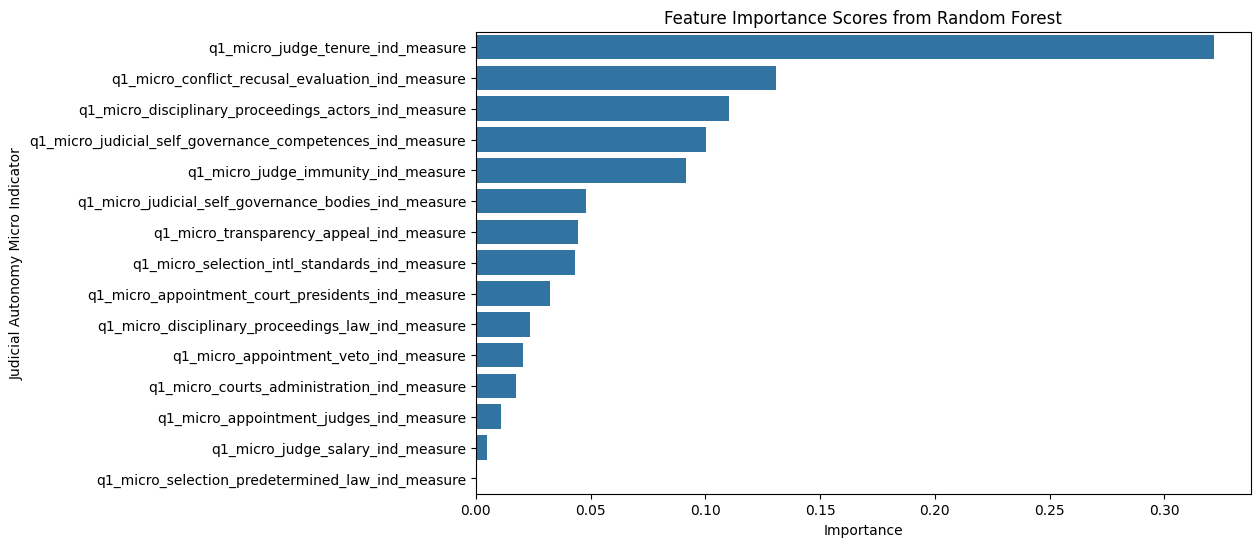

In [57]:
# Plot feature importances

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df_regr, x='Importance', y='Feature')

plt.title('Feature Importance Scores from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Judicial Autonomy Micro Indicator')
plt.show()

<Axes: xlabel='v2x_polyarchy'>

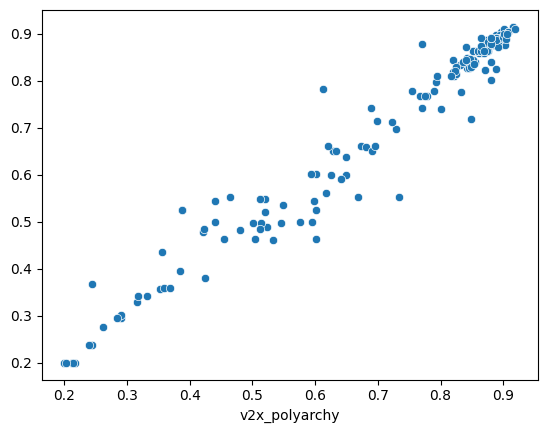

In [58]:
# For scatterplot
sns.scatterplot(x=y_test, y=y_pred)

C:\Users\Friederike\AppData\Local\Temp\ipykernel_14500\1672558840.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='#995263')  # Diagonal line for reference


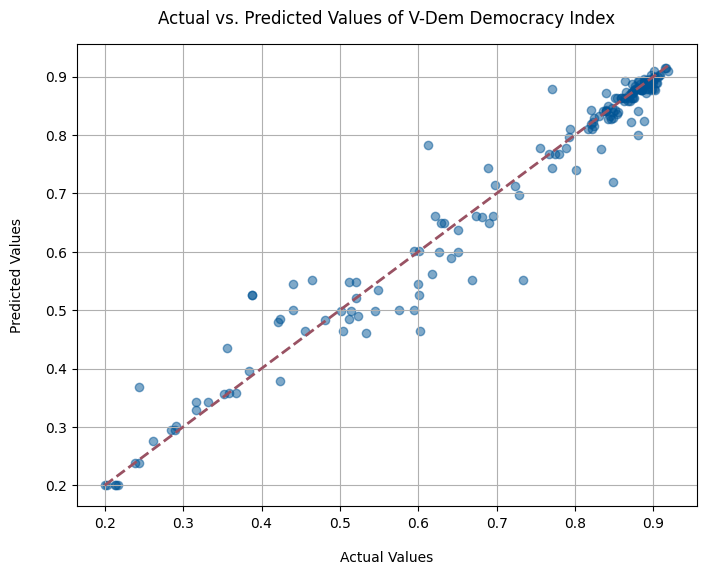

In [79]:
import matplotlib.pyplot as plt

# Plotting y_test vs. y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='#005495')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='#995263')  # Diagonal line for reference

plt.title('Actual vs. Predicted Values of V-Dem Democracy Index', fontsize=12, pad=15)
plt.xlabel('Actual Values', labelpad=15)
plt.ylabel('Predicted Values', labelpad=15)
plt.grid(True)
plt.show()

In [60]:
country_info = q1_index_macro_micro_vdem['country']
year_info = q1_index_macro_micro_vdem['year']

In [61]:
X_test['predictions'] = y_pred
X_test['country'] = countries_test.reset_index(drop=True)
X_test['year'] = years_test.reset_index(drop=True)

In [62]:
X_test

,q1_micro_appointment_judges_ind_measure,q1_micro_appointment_court_presidents_ind_measure,q1_micro_appointment_veto_ind_measure,q1_micro_selection_predetermined_law_ind_measure,q1_micro_selection_intl_standards_ind_measure,q1_micro_transparency_appeal_ind_measure,q1_micro_judge_tenure_ind_measure,q1_micro_judge_immunity_ind_measure,q1_micro_judge_salary_ind_measure,q1_micro_disciplinary_proceedings_law_ind_measure,q1_micro_disciplinary_proceedings_actors_ind_measure,q1_micro_conflict_recusal_evaluation_ind_measure,q1_micro_judicial_self_governance_bodies_ind_measure,q1_micro_judicial_self_governance_competences_ind_measure,q1_micro_courts_administration_ind_measure,predictions,country,year
319,0.83,0.83,1.00,1.0,0.75,0.75,0.75,0.50,1.0,0.88,1.00,0.67,0.83,0.67,1.00,0.649958,NaN,NaN
377,1.00,0.67,1.00,1.0,0.88,1.00,0.88,0.25,1.0,1.00,0.75,0.67,0.83,1.00,1.00,0.839804,NaN,NaN
538,0.50,0.50,0.00,0.0,0.12,0.83,0.50,0.50,1.0,0.88,0.66,1.00,0.83,0.67,0.00,0.463839,NaN,NaN
296,0.50,0.50,0.33,1.0,1.00,0.92,1.00,0.75,1.0,0.62,0.83,0.67,0.83,0.67,0.67,0.887715,NaN,NaN
531,0.50,0.50,0.00,0.0,0.12,0.83,0.50,0.50,1.0,0.88,0.66,1.00,0.83,0.67,0.00,0.463839,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.67,0.33,0.33,1.0,0.88,1.00,0.88,0.25,1.0,1.00,0.84,1.00,0.83,0.56,1.00,0.551520,NaN,NaN
97,0.50,0.50,0.00,1.0,1.00,1.00,0.88,0.75,1.0,0.88,0.67,0.67,0.67,0.78,0.17,0.891762,Estonia,2001.0
906,0.50,0.50,0.00,1.0,1.00,0.67,0.75,0.75,1.0,0.00,0.33,0.67,1.00,0.89,0.33,0.862444,NaN,NaN
467,0.50,0.50,0.67,1.0,0.88,0.92,0.88,0.75,1.0,1.00,0.75,1.00,0.00,0.00,0.50,0.810793,NaN,NaN


In [64]:
# Create the results DataFrame
results_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred,
    # Assuming "country" information is still aligned and can be indexed directly.
    # If your X_test lost its original index during processing,
    # you might need to adjust how you retrieve associated country information.
    "country": q1_index_macro_micro_vdem.loc[y_test.index, "country"]  
})

# Calculate residuals within the results_df DataFrame
results_df["residual"] = results_df["y_test"] - results_df["y_pred"]

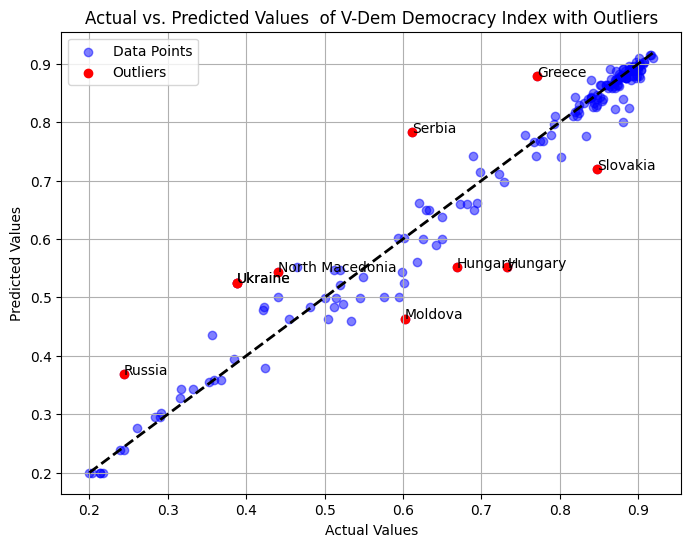

In [67]:
results_df['residual'] = results_df['y_test'] - results_df['y_pred']  # Calculate residuals

# Define a threshold for considering a data point as an outlier
outlier_threshold = np.percentile(np.abs(results_df['residual']), 95)  # 95th percentile of absolute residuals

plt.figure(figsize=(8, 6))

# Plot all points
plt.scatter(results_df['y_test'], results_df['y_pred'], alpha=0.5, color='blue', label='Data Points')

# Highlight outliers
outliers = results_df[np.abs(results_df['residual']) > outlier_threshold]
plt.scatter(outliers['y_test'], outliers['y_pred'], color='red', label='Outliers')

# Annotate outliers with country names
for _, row in outliers.iterrows():
    plt.text(row['y_test'], row['y_pred'], row['country'], color='black')

# Diagonal line for perfect predictions
plt.plot([results_df['y_test'].min(), results_df['y_test'].max()], 
         [results_df['y_test'].min(), results_df['y_test'].max()], 'k--', lw=2)

plt.title('Actual vs. Predicted Values of V-Dem Democracy Index with Outliers')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()